In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [26]:
df=pd.read_csv('covidData2.csv')
df.index = np.arange(1, len(df)+1)
df

,State/Union Territory,Latitude,Longitude,Cases,Deaths,Recoveries,Active
1,Andaman and Nicobar Islands,11.667026,92.735983,47,0,36,11
2,Andhra Pradesh,14.750429,78.570026,8452,101,4111,4240
3,Arunachal Pradesh,27.100399,93.616601,135,0,14,121
4,Assam,26.749981,94.216667,4904,9,3039,1856
5,Bihar,25.785414,87.479973,7533,52,5529,1952
6,Chandigarh,30.719997,76.780006,404,6,316,82
7,Chhattisgarh,22.090420,82.159987,2041,11,1394,636
8,Dadra and Nagar Haveli and Daman and Diu,20.266578,73.016618,68,0,26,42
9,Delhi,28.669993,77.230004,56746,2112,31294,23340
10,Goa,15.491997,73.818001,754,0,129,625


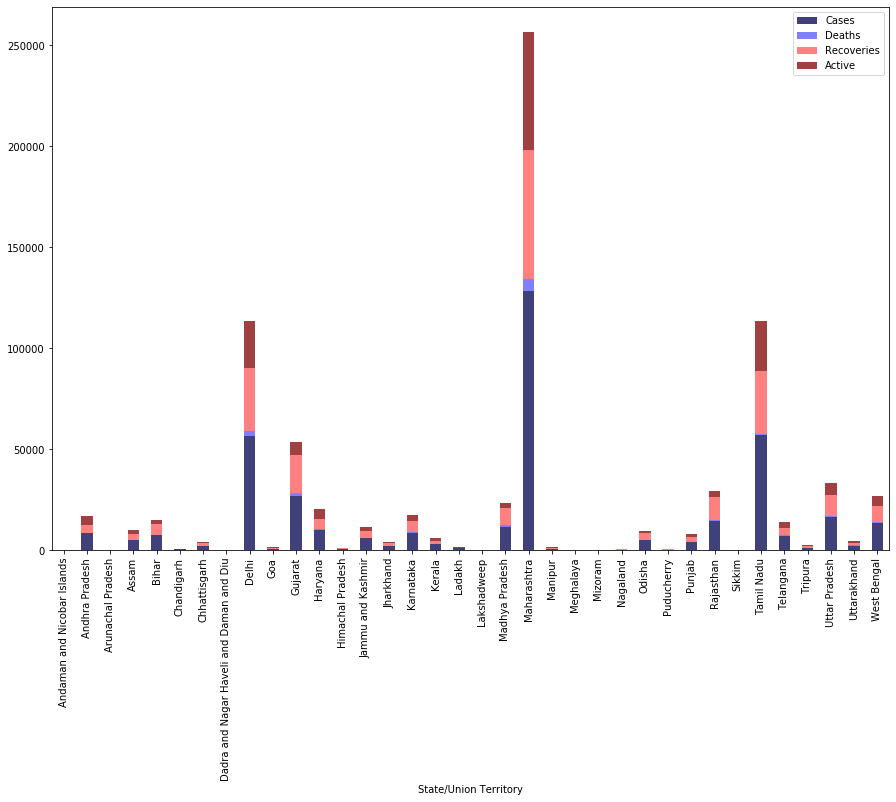

In [27]:
df.drop(['Latitude', 'Longitude'], axis=1).plot.bar(x='State/Union Territory',stacked=True,figsize=(15,10),alpha=0.75,cmap='seismic')

In [28]:
a=20.5937
b=78.9629

m = folium.Map(location=[a,b])

folium.FitBounds([(a-25,b+30), (a+20,a+15)]).add_to(m)


for i in df.index:
    folium.CircleMarker(
        location=[df['Latitude'][i],df['Longitude'][i]],
       radius =float( df['Cases'][i]/2500),
       
        
        popup = " Cases: "+str(df["Cases"][i])+" Deaths: "+str(df["Deaths"][i])+" Recoveries: "+str(df["Recoveries"][i])+" Active: "+str(df["Active"][i]),
        tooltip= df['State/Union Territory'][i],
        color="#3186cc",
        fill=False,
        fill_color="#3186cc"
    ).add_to(m)
m